In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

### Simulation

In [2]:
sim = rw.Simulation()

nr_particles = 1*10**4
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 10**12 # eV
source = rw.PointSourceIsotropicPhi(energy, source_pos, nr_particles)
sim.add_source(source)

nr_steps = 1*10**5
step_size = 1.0*10**11 # [m]
diffusion_coefficient = 1.5*10**21 # [m^2/s]
speed_of_light = 3*10**8 # [m/s]
mfp_iso = 3*diffusion_coefficient/speed_of_light
mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
propagator = rw.IsotropicPropagator(mfp, nr_steps, step_size)
sim.add_propagator(propagator)

substeps = [False, False, True] # observe only steps (no substeps)
sphere = 10**14 # [m]
spheres = [sphere]
observer = rw.SphericalObserver(substeps, spheres, on_detection_deactivate=True)
sim.add_observer(observer)

start simulation
Propagator initialized
Observer initialized


In [ ]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5')

### Analysis

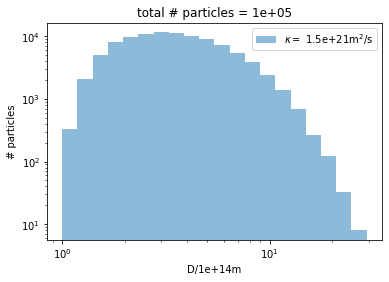

In [50]:
df = pd.read_pickle("data/data_tut_5.pkl")
bins = 20
trajectory_lengths = df['d']
d = trajectory_lengths/10**14
hist, bins = np.histogram(d, bins=bins)
logbins = np.logspace(np.log10(min(d)),np.log10(max(d)),len(bins))
plt.hist(d, bins=logbins, alpha=0.5, label='$\kappa =$ {:.1e}m$^2$/s'.format(diffusion_coefficient))

plt.title('total # particles = {:.0e}'.format(nr_particles))
plt.xlabel('D/{:.0e}m'.format(sphere))
plt.ylabel('# particles')
plt.loglog()
plt.legend()
plt.savefig('traj_lengths_rwpropa.png')
plt.show()

## Sphere source

In [3]:
sim = rw.Simulation()

nr_particles = 2*10**5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 10**12 # eV
sphere = 10**14 # [m]
radius = sphere
source = rw.SphereSourceIsotropic(energy, source_pos, nr_particles, radius)
sim.add_source(source)

nr_steps = 1*10**5
step_size = 1.0*10**11 # [m]
diffusion_coefficient = 1.5*10**21 # [m^2/s]
speed_of_light = 3*10**8 # [m/s]
mfp_iso = 3*diffusion_coefficient/speed_of_light
mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
propagator = rw.IsotropicPropagator(mfp, nr_steps, step_size)
sim.add_propagator(propagator)

substeps = [False, False, True] # observe only steps (no substeps)
spheres = [sphere]
observer = rw.SphericalObserver(substeps, spheres, on_detection_deactivate=True)
sim.add_observer(observer)

start simulation
Propagator initialized
Observer initialized


In [4]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere')

CPU times: user 14min 14s, sys: 14.1 s, total: 14min 28s
Wall time: 14min 29s
saved data file data/data_tut_5_sphere.pkl


In [22]:
sim = rw.Simulation()

nr_particles = 2*10**5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 10**12 # eV
sphere = 10**14 # [m]
radius = sphere
source = rw.SphereSourceIsotropic(energy, source_pos, nr_particles, radius)
sim.add_source(source)

nr_steps = 1*10**5
step_size = 1.0*10**11 # [m]
diffusion_coefficient = 1.5*10**20 # [m^2/s]
speed_of_light = 3*10**8 # [m/s]
mfp_iso = 3*diffusion_coefficient/speed_of_light
mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
propagator = rw.IsotropicPropagator(mfp, nr_steps, step_size)
sim.add_propagator(propagator)

substeps = [False, False, True] # observe only steps (no substeps)
spheres = [sphere]
observer = rw.SphericalObserver(substeps, spheres, on_detection_deactivate=True)
sim.add_observer(observer)

start simulation
Propagator initialized
Observer initialized


In [7]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere_20')

CPU times: user 54min 28s, sys: 337 ms, total: 54min 28s
Wall time: 54min 28s
saved data file data/data_tut_5_sphere_20.pkl


In [8]:
sim = rw.Simulation()

nr_particles = 2*10**5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 10**12 # eV
sphere = 10**14 # [m]
radius = sphere
source = rw.SphereSourceIsotropic(energy, source_pos, nr_particles, radius)
sim.add_source(source)

nr_steps = 1*10**5
step_size = 1.0*10**11 # [m]
diffusion_coefficient = 1.5*10**19 # [m^2/s]
speed_of_light = 3*10**8 # [m/s]
mfp_iso = 3*diffusion_coefficient/speed_of_light
mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
propagator = rw.IsotropicPropagator(mfp, nr_steps, step_size)
sim.add_propagator(propagator)

substeps = [False, False, True] # observe only steps (no substeps)
spheres = [sphere]
observer = rw.SphericalObserver(substeps, spheres, on_detection_deactivate=True)
sim.add_observer(observer)

start simulation
Propagator initialized
Observer initialized


In [9]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere_19')

CPU times: user 3h 46min 34s, sys: 1.05 s, total: 3h 46min 35s
Wall time: 3h 46min 37s
saved data file data/data_tut_5_sphere_19.pkl


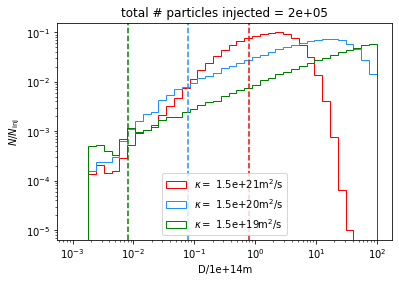

In [25]:
files = ["data/data_tut_5_sphere.pkl", "data/data_tut_5_sphere_20.pkl", "data/data_tut_5_sphere_19.pkl"]
colors = ['r', 'dodgerblue', 'green']
kappas = [1.5*10**21, 1.5*10**20, 1.5*10**19]
transitions = [8*10**13, 8*10**12, 8*10**11]

bins = 40
logbins = np.logspace(np.log10(step_size/sphere),np.log10(step_size*nr_steps/sphere),bins)

for i, file in enumerate(files):
    df = pd.read_pickle(file)
    trajectory_lengths = df['d']
    d = trajectory_lengths/sphere
    weights = np.ones_like(d)/nr_particles
    plt.hist(d, bins=logbins, weights=weights, histtype=u'step', edgecolor=colors[i], linewidth=1., facecolor="None", label='$\kappa=$ {:.1e}m$^2$/s'.format(kappas[i]))
    plt.axvline(x=transitions[i]/sphere, color=colors[i], ls='--')

plt.title('total # particles injected = {:.0e}'.format(nr_particles))
plt.xlabel('D/{:.0e}m'.format(sphere))
plt.ylabel('$N/N_\mathrm{inj}$')
plt.loglog()
plt.legend(loc = "lower center")
plt.savefig('traj_lengths_rwpropa_normalized.pdf')
plt.show()

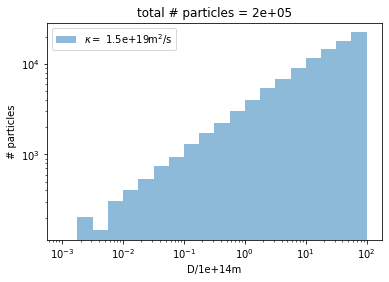

In [18]:
df = pd.read_pickle("data/data_tut_5_sphere_19.pkl")
bins = 20
trajectory_lengths = df['d']
d = trajectory_lengths/10**14
hist, bins = np.histogram(d, bins=bins)
logbins = np.logspace(np.log10(min(d)),np.log10(max(d)),len(bins))
plt.hist(d, bins=logbins, alpha=0.5, label='$\kappa =$ {:.1e}m$^2$/s'.format(diffusion_coefficient))

plt.title('total # particles = {:.0e}'.format(nr_particles))
plt.xlabel('D/{:.0e}m'.format(sphere))
plt.ylabel('# particles')
plt.loglog()
plt.legend()
plt.savefig('traj_lengths_rwpropa.png')
plt.show()

In [51]:
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,6331.0,6.331433e+14,-6.408548e+13,7.493991e+13,1.674311e+13,2.104218,0.955393,1.000000e+14,2.0
1,1.0,4106.0,4.106647e+14,3.290897e+12,-5.733053e+13,8.192631e+13,5.192996,4.096986,1.000000e+14,2.0
2,2.0,2120.0,2.121119e+14,-4.994050e+13,2.095773e+13,8.412038e+13,3.416327,0.955393,1.000000e+14,2.0
3,3.0,2362.0,2.363140e+14,4.012562e+13,9.162642e+13,1.212435e+12,3.480489,4.096986,1.000000e+14,2.0
4,4.0,5480.0,5.480079e+14,7.869294e+13,6.408593e+12,6.137195e+13,3.178626,0.955393,1.000000e+14,2.0
...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,3309.0,3.309976e+14,5.692639e+13,-8.152214e+13,-1.073871e+13,3.768871,0.955393,1.000000e+14,2.0
99996,99996.0,10879.0,1.088213e+15,-3.464100e+12,3.695044e+12,9.988307e+13,5.230603,4.096986,1.000000e+14,2.0
99997,99997.0,2386.0,2.387143e+14,2.061133e+13,-2.430634e+13,9.485980e+13,5.700218,0.955393,1.000000e+14,2.0
99998,99998.0,2429.0,2.430147e+14,-5.080652e+13,1.501110e+12,8.614124e+13,5.452890,0.955393,1.000000e+14,2.0


In [49]:
kappas = [1.5*10**21, 1.5*10**20, 1.5*10**19]
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps/100, diffusion_coefficient_para = kappas[0], nr_obs_steps = 600)
%time sim.simulate()

simulate with a diffusion coefficient of  1.5e+21 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 5.94 s, sys: 116 ms, total: 6.05 s
Wall time: 6.07 s


init statistics plotting class


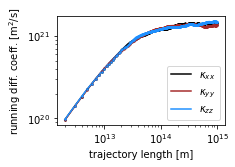

diffusion coefficients computed between 3.20e+14m and 1.00e+15m with 100 data points
kappa_{xx}: 1.42e+21 m²/s +- 1.98e+19 m²/s
kappa_{yy}: 1.34e+21 m²/s +- 3.41e+19 m²/s
kappa_{zz}: 1.43e+21 m²/s +- 4.89e+19 m²/s


In [50]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

In [7]:
kappa = 1.5*10**20
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps/100, step_size = 1*10**11, diffusion_coefficient_para = kappa, nr_obs_steps = 600)
%time sim.simulate()

simulate with a diffusion coefficient of  1.5e+20 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 5.52 s, sys: 108 ms, total: 5.63 s
Wall time: 5.67 s


init statistics plotting class


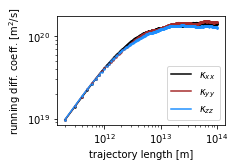

diffusion coefficients computed between 3.20e+13m and 1.00e+14m with 100 data points
kappa_{xx}: 1.42e+20 m²/s +- 2.47e+18 m²/s
kappa_{yy}: 1.47e+20 m²/s +- 4.12e+18 m²/s
kappa_{zz}: 1.32e+20 m²/s +- 1.81e+18 m²/s


In [8]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

In [13]:
kappa = 1.5*10**19
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps/100, diffusion_coefficient_para = kappa, nr_obs_steps = 600,  step_size = 1*10**10)
%time sim.simulate()

simulate with a diffusion coefficient of  1.5e+19 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 5.65 s, sys: 88.3 ms, total: 5.73 s
Wall time: 5.77 s


init statistics plotting class


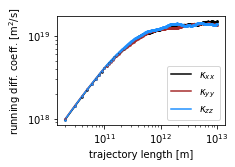

diffusion coefficients computed between 3.20e+12m and 1.00e+13m with 100 data points
kappa_{xx}: 1.45e+19 m²/s +- 4.88e+17 m²/s
kappa_{yy}: 1.41e+19 m²/s +- 1.91e+17 m²/s
kappa_{zz}: 1.4e+19 m²/s +- 2.98e+17 m²/s


In [14]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

In [62]:
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,1.0,2.000000e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.290132,2.825604,-1.0,2.0
1,0.0,2.0,3.000000e+12,-5.773503e+11,5.773503e+11,-5.773503e+11,0.290132,2.825604,-1.0,2.0
2,0.0,3.0,4.000001e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.290132,2.825604,-1.0,2.0
3,0.0,4.0,5.000000e+12,-5.773503e+11,5.773503e+11,-5.773503e+11,0.290132,2.825604,-1.0,2.0
4,0.0,5.0,6.000001e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.290132,2.825604,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
44495,99.0,92600.0,9.284800e+16,5.773503e+11,5.773503e+11,5.773503e+11,2.356968,0.894562,-1.0,2.0
44496,99.0,94397.0,9.465403e+16,0.000000e+00,0.000000e+00,0.000000e+00,2.356968,0.894562,-1.0,2.0
44497,99.0,96228.0,9.649422e+16,5.773503e+11,5.773503e+11,5.773503e+11,2.356968,0.894562,-1.0,2.0
44498,99.0,98096.0,9.837160e+16,5.773503e+11,5.773503e+11,5.773503e+11,2.356968,0.894562,-1.0,2.0


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 61.0, 62.0, 63.0, 64.0, 66.0, 67.0, 68.0, 69.0, 71.0, 72.0, 74.0, 75.0, 76.0, 78.0, 80.0, 81.0, 83.0, 84.0, 86.0, 88.0, 89.0, 91.0, 93.0, 95.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 113.0, 115.0, 117.0, 119.0, 122.0, 124.0, 126.0, 129.0, 131.0, 134.0, 137.0, 139.0, 142.0, 145.0, 148.0, 150.0, 153.0, 156.0, 159.0, 162.0, 166.0, 169.0, 172.0, 175.0, 179.0, 182.0, 186.0, 190.0, 193.0, 197.0, 201.0, 205.0, 209.0, 213.0, 217.0, 221.0, 225.0, 230.0, 234.0, 239.0, 243.0, 248.0, 253.0, 258.0, 263.0, 268.0, 273.0, 279.0, 284.0, 290.0, 295.0, 301.0, 307.0, 313.0, 319.0, 325.0, 331.0, 338.0, 344.0, 351.0, 358.0, 365.0, 372.0, 379.0, 386.0, 3

/home/patrick/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


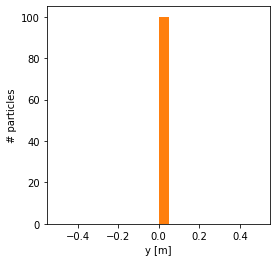

In [61]:
steps = sorted(list(set(df['i'])))
print(steps)
sta.plot_distribution('y', 1, 20, None)

In [69]:
import pandas as pd
df = pd.read_pickle("data/data_tut_5.pkl")
d = df['d'].values
print('{:.1e}'.format(np.mean(d)),'+/-', '{:.1e}'.format(np.std(d)), 'm')

4.1e+14 +/- 2.5e+14 m


In [10]:
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,1.0,2.000000e+12,1.154701e+12,1.154701e+12,1.154701e+12,6.240908,2.007532,-1.0,2.0
1,0.0,2.0,3.000000e+12,1.732051e+12,1.732051e+12,1.732051e+12,6.240908,2.007532,-1.0,2.0
2,0.0,3.0,4.000001e+12,2.309401e+12,2.309401e+12,2.309401e+12,6.240908,2.007532,-1.0,2.0
3,0.0,4.0,5.000000e+12,1.732051e+12,2.886751e+12,2.886751e+12,6.240908,2.007532,-1.0,2.0
4,0.0,5.0,6.000001e+12,1.154701e+12,3.464101e+12,3.464101e+12,6.240908,2.007532,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
297995,999.0,954.0,9.549905e+14,-7.332350e+13,1.137383e+14,-1.691643e+14,2.481308,2.453735,-1.0,2.0
297996,999.0,965.0,9.659904e+14,-7.967439e+13,1.200892e+14,-1.755152e+14,2.481308,2.453735,-1.0,2.0
297997,999.0,977.0,9.779903e+14,-8.660265e+13,1.270175e+14,-1.824435e+14,2.481308,2.453735,-1.0,2.0
297998,999.0,988.0,9.889902e+14,-9.295354e+13,1.333683e+14,-1.887944e+14,2.481308,2.453735,-1.0,2.0
